<a href="https://colab.research.google.com/github/skywalker290/Image-Classification-Model/blob/main/CNN_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow.keras


In [100]:
(x_train,y_train),(x_test,y_test)=keras .datasets.fashion_mnist.load_data()

In [101]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [102]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [103]:
class_labels=['T-shirt/top','Trouser','Pullover','Dress','coat','sandal','shirt','sneakers','bag','ankle boot']

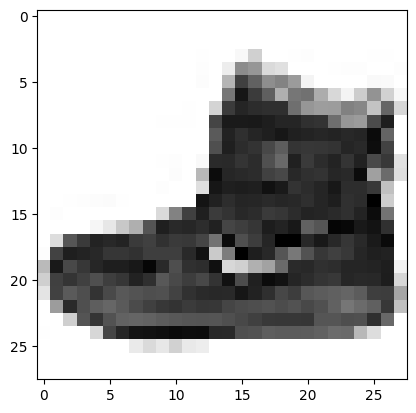

In [104]:
plt.imshow(x_train[0],cmap='Greys')

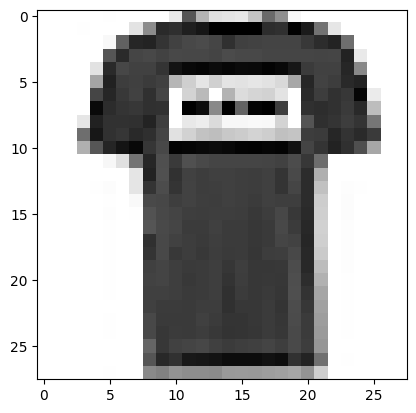

In [105]:
plt.imshow(x_train[1],cmap='Greys')

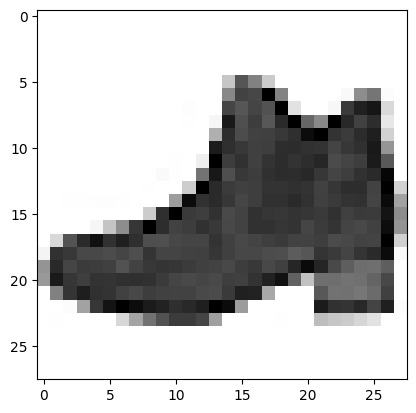

In [106]:
plt.imshow(x_train[15],cmap='Greys')

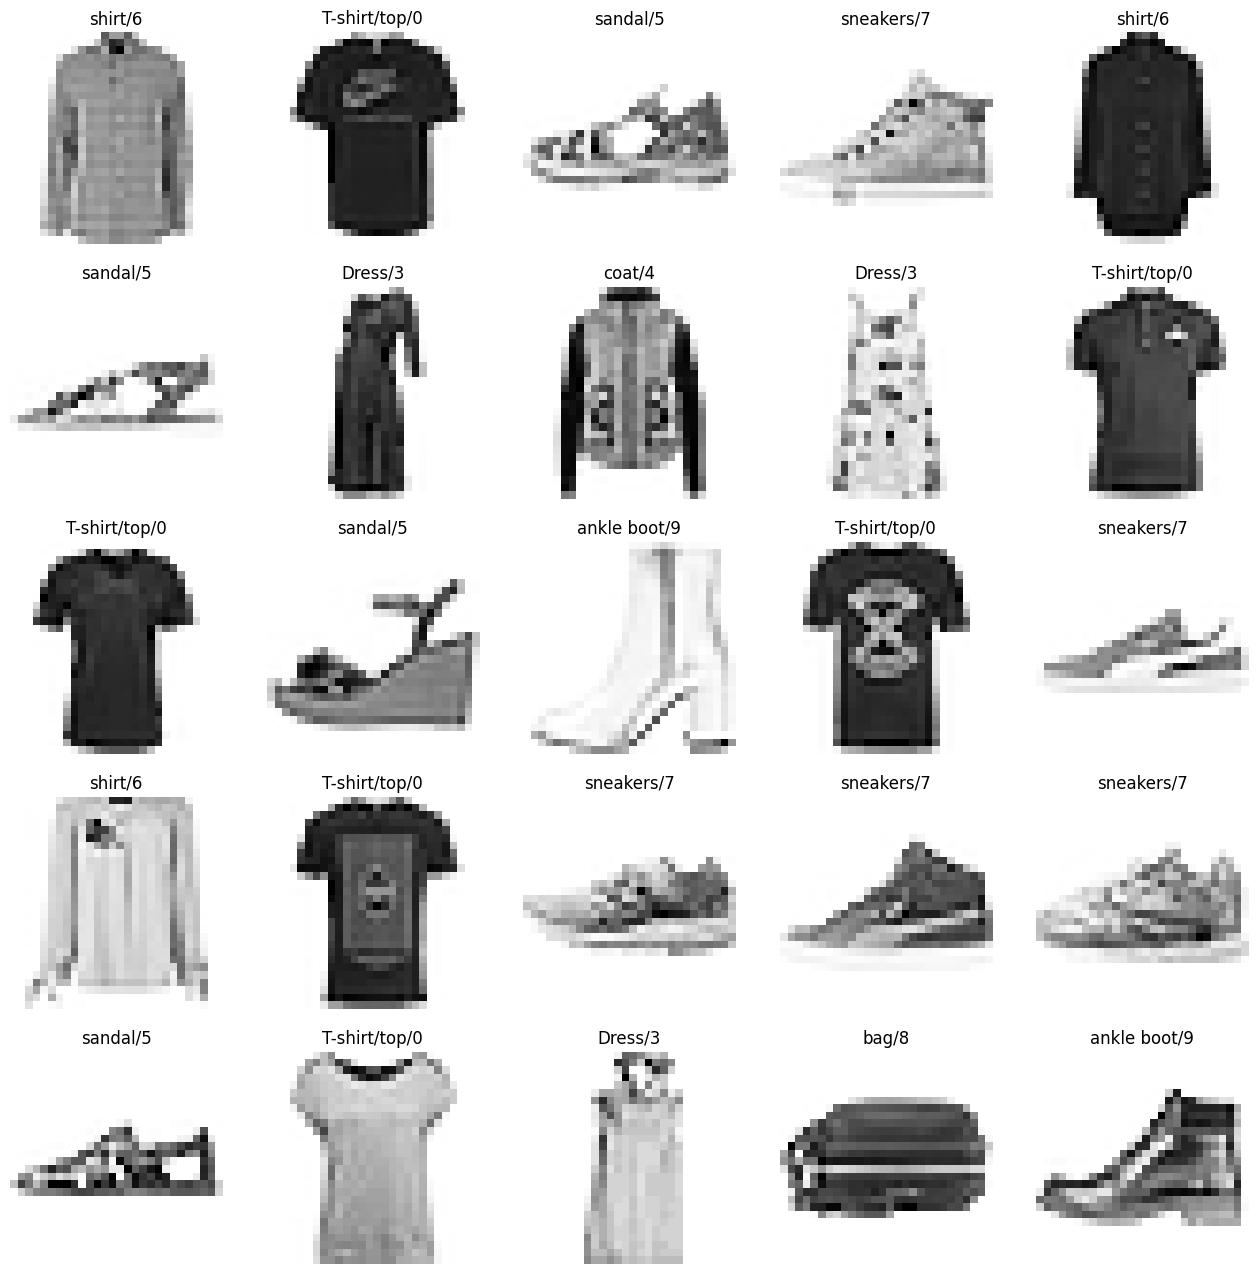

In [107]:
plt.figure(figsize=(16,16))
j=1

for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

In [108]:
x_train.ndim
y_train.shape

(60000,)

[9 0 3 2 7 5 1 6 4 8]
[0, 1, 3, 5, 6, 8, 16, 18, 19, 23]
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


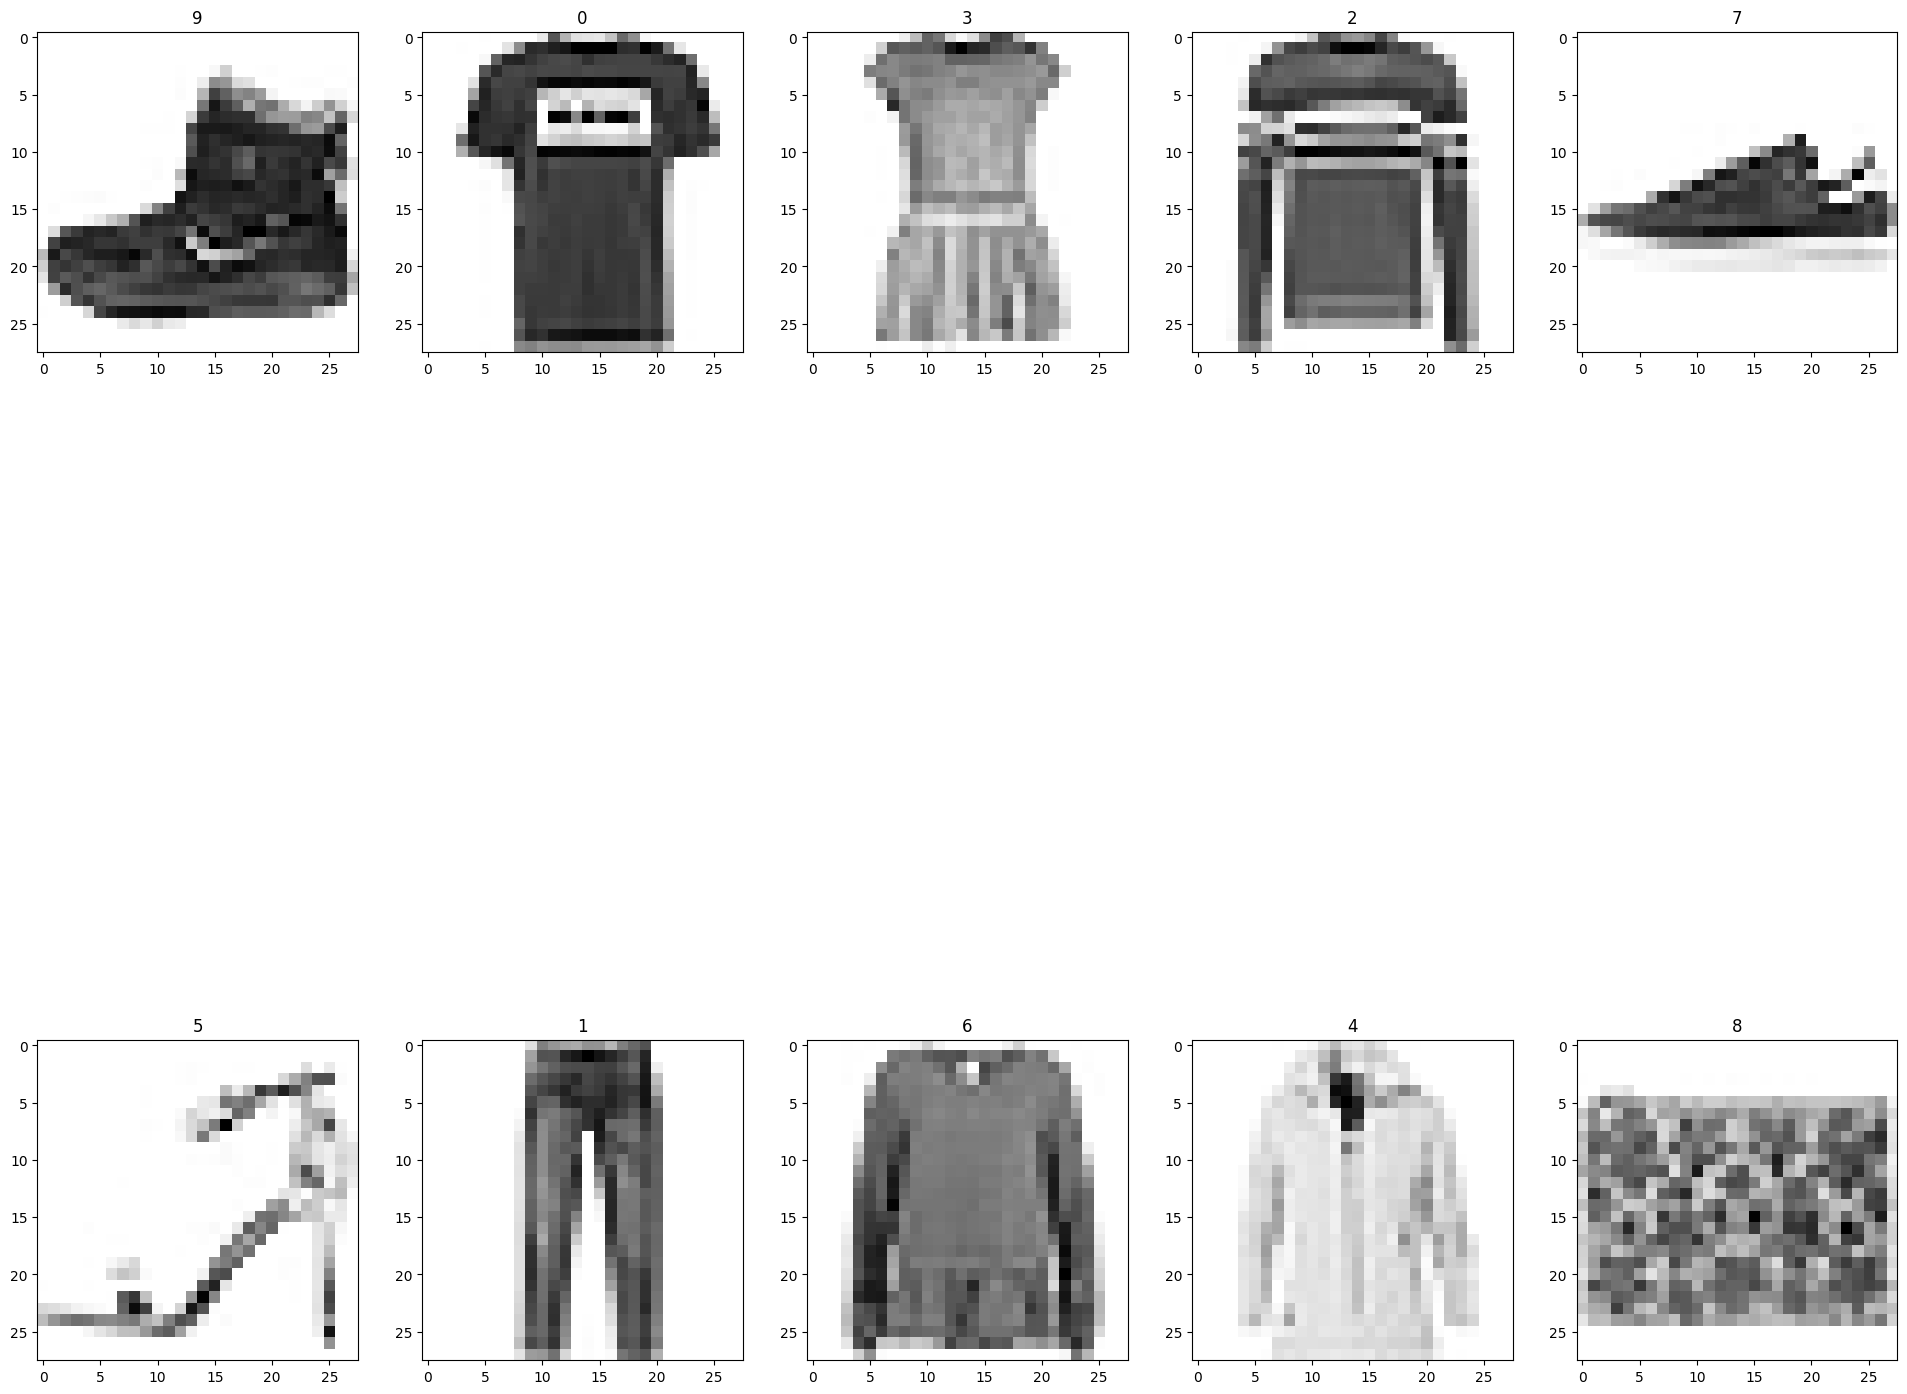

In [109]:
fashionMNIST=keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test)= fashionMNIST.load_data()
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
eil = np.array(pd.unique(y_train))
eindex1=[]
print(eil)

for i in eil:
  eindex1.append(list(y_train).index(i))
print(eindex1)

plt.figure(figsize=(24,24))
for x,y in enumerate(eindex1):
  print(x_train[y].shape)
  plt.subplot(2,5,x+1)
  plt.imshow(tensorflow.squeeze(x_train[y]),cmap='Greys')
  plt.title('{}'.format(eil[x]))

In [110]:
x_train.ndim

4

In [111]:
x_train.shape,y_train.shape

((60000, 28, 28, 1), (60000,))

In [112]:
# x_train =np.expand_dims(x_train,-1)
# x_test= np.expand_dims(x_test,-1)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


Feature scalling

In [113]:
x_train = x_train/255;
x_test = x_test/255;

In [114]:
x_train.shape,y_train.shape

((60000, 28, 28, 1, 1), (60000,))

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [116]:
x_train.shape,y_train.shape

((48000, 28, 28, 1, 1), (48000,))